In [29]:
from IPython.display import display
import numpy as np
import pandas as pd 

pd.set_option('display.max_columns', 40) # выводить больше столбцов
pd.set_option('display.max_rows', 40)   # выводить больше строк
# plt.style.use('default')    # корректный вывод графиков в темной теме Matplotlib
# fig.show(renderer='notebook') #включение анимации
#!/usr/bin/env python

import io
import zipfile
import requests  # $ pip install requests


# unzip with link
# r = requests.get("https://lms.skillfactory.ru/assets/courseware/v1/e157dad19d7511561f697586ed146datae/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip") # link
# with r, zipfile.ZipFile(io.BytesIO(r.content)) as archive:
#   archive.extractall('data')

# # unzip file on the disk
# with zipfile.ZipFile('data/wine_cleared.zip', 'r') as archive:
#     archive.extractall('data')

In [30]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])
calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [31]:
calls
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [32]:

calls['time_connection'] = (calls['created_at']-calls['agent_date']).dt.seconds
calls['time_connection'].sum()
calls

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


In [33]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls
calls['is_connection'].sum()

7

In [34]:
calls['time_diff'] = (calls['end_date']-calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [35]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


In [36]:
!pip install category_encoders
# Импортируем библиотеку category-encoders для дальнейшего использования. 

import category_encoders as ce

Рассмотрим следующие популярные способы кодирования: 

порядковое кодирование (Ordinal Encoding); 

однократное кодирование (OneHot Encoding); 

бинарное кодирование (Binary Encoding).

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [37]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing = pd.concat([clothing, data_bin], axis=1)

type(clothing)
clothing

,size,type,size,type
0,xxs,dress,1,1
1,xxs,skirt,1,2
2,xs,dress,2,1
3,s,skirt,3,2
4,m,dress,4,1
5,l,shirt,5,3
6,s,coat,3,4
7,m,coat,4,4
8,xxl,shirt,6,3
9,l,dress,5,1


In [38]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type'], use_cat_names = True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,0,0,0
1,xxs,skirt,0,1,0,0
2,xs,dress,1,0,0,0
3,s,skirt,0,1,0,0
4,m,dress,1,0,0,0
5,l,shirt,0,0,1,0
6,s,coat,0,0,0,1
7,m,coat,0,0,0,1
8,xxl,shirt,0,0,1,0
9,l,dress,1,0,0,0


In [39]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_0,type_1,type_2
0,xxs,dress,0,0,1
1,xxs,skirt,0,1,0
2,xs,dress,0,0,1
3,s,skirt,0,1,0
4,m,dress,0,0,1
5,l,shirt,0,1,1
6,s,coat,1,0,0
7,m,coat,1,0,0
8,xxl,shirt,0,1,1
9,l,dress,0,0,1


In [40]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df['product'])
df = pd.concat([df, data_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['payment_type'], use_cat_names = True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df['payment_type'])
df = pd.concat([df, type_bin], axis=1)
df


,product,price,payment_type,product,payment_type_Mastercard,payment_type_Visa,payment_type_Amex
0,Product1,1200,Mastercard,1,1,0,0
1,Product2,3600,Visa,2,0,1,0
2,Product3,7500,Amex,3,0,0,1


## 6. Преобразование признаков. Нормализация. Стандартизация
 Добавить страницу в мои закладки
→ Проектирование признаков подразумевает под собой изменение данных, их удаление, создание и тд. В этом юните мы изучим основы преобразования признаков и реализацию этих методов в Python.

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них — это нормализация и стандартизация, которые мы рассмотрим в этом юните.

In [41]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

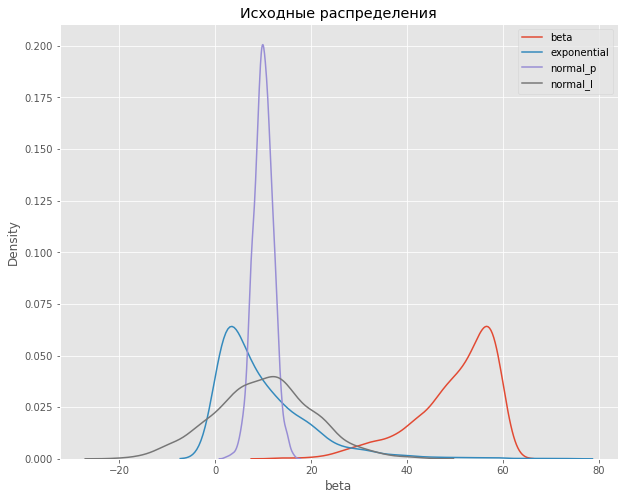

In [42]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend();


In [43]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


## MINMAXSCALER

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

Из каждого значения признака х вычитается минимальное значение этого признака:  
Результат вычитания делится на между максимумом и минимумом признака: 
Например, температура в горном посёлке за день может меняться от 10 до 35 градусов. Текущая температура составляет 17 градусов. 

Нормализуем это значение:

Нормализованное значение 0.28 лежит в диапазоне от 0 до 1, и ближе к левой границе распределения (0), что соответствует также ненормализованному распределению (значение 17 ближе к 10).

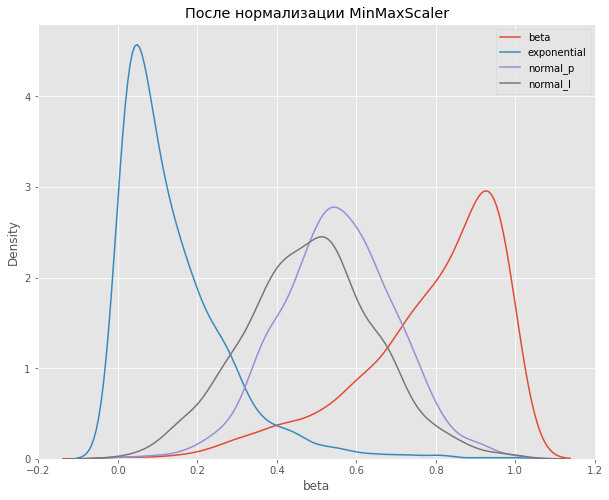

In [44]:
# Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform.
# Вы познакомитесь с ней подробнее в модулях машинного обучения.

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_mm['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_mm['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_mm['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

## ROBUSTSCALER

Нормализация методом RobustScaler происходит в несколько этапов:

из каждого значения признака вычитается медиана признака: 

полученное значение делится на межквартильный размах: 
Например, имеется числовой ряд [1, 2, 3, 4, 5]. Медиана ряда — 3. Межквартильный размах: . Мы хотим нормализовать число 4.

Таким образом, значение 4 после нормализации приняло значение 0.5.

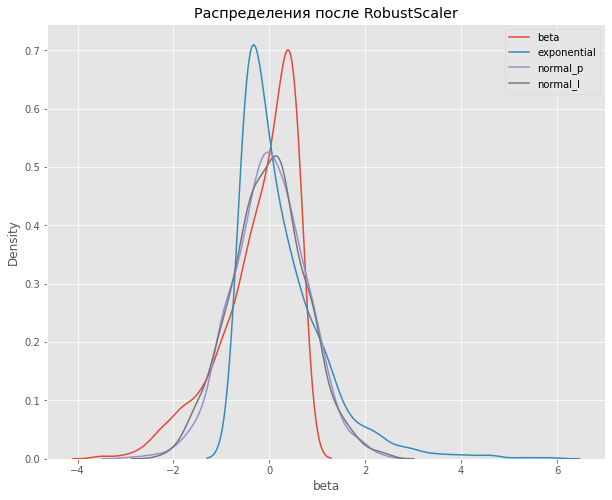

In [45]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_r['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_r['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_r['normal_l'], ax=ax1, label ='normal_l');
plt.legend()

Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

В ЧЁМ РАЗНИЦА?

Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

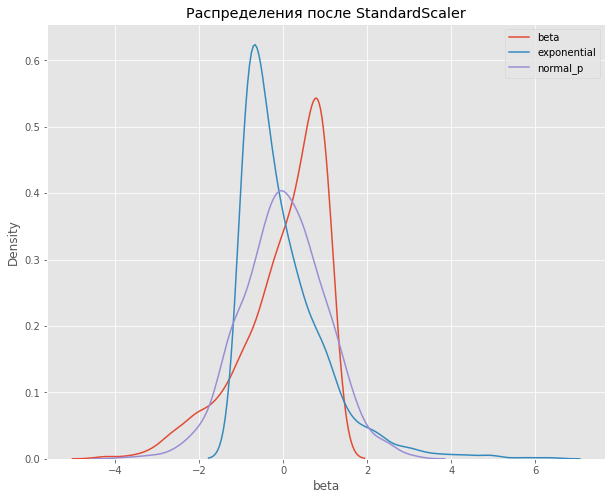

In [46]:
# STANDARDSCALER
# Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.
# Для стандартизации используем класс StandardScaler.

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_s['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_s['normal_p'], ax=ax1, label ='normal_p')
plt.legend()

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)